### <span style="font-family:candara">Minneapolis table Parse</span>
<span style="font-family:candara">**Created by** : Isaac Kwabena Owusu-Appiah</span><br>
<span style="font-family:candara">**Date** : $12^{th}$ August, 2022</span> 
#### <span style="font-family:candara">1.1: Problem Statement</span>
<span style="font-family:candara">To parse table and clean it using Pandas.read_html - (**Data Cleaning**)</span>

#### <span style="font-family:candara">Installing Packages</span>

In [1]:
# Packages for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
table_min = pd.read_html('https://en.wikipedia.org/wiki/Minneapolis')

<span style="font-family:candara">The unique point here is that table_MN is a list of all the tables on the page:</span>

In [3]:
print(f'Total tables: {len(table_min)}')

Total tables: 17


><span style="font-family:candara">With 17 tables, it can be challenging to find the one we need. To make the tables selection easier, use the match parameter to select a subset of tables. We can use the caption 'Election results from statewide races' to select the table</span>

In [4]:
# Read in the wikipedia page and get the dataframe
table_co = pd.read_html('https://en.wikipedia.org/wiki/Minneapolis', match = 'Minneapolis companies ')
len(table_co)

1

In [5]:
# obtain the table
df = table_co[0]
df.head()

,0,1,2,3
0,Minneapolis rank,Corporation,US rank,Revenue (in millions)
1,1,Target Corporation,33,"$109,120"
2,2,U.S. Bancorp,149,"$27,401"
3,3,Xcel Energy,271,"$15,310"
4,4,Ameriprise Financial,289,"$14,347"


In [6]:
# set first row as column names
df.columns = df.iloc[0]
df = df[1:]
df

,Minneapolis rank,Corporation,US rank,Revenue (in millions)
1,1,Target Corporation,33,"$109,120"
2,2,U.S. Bancorp,149,"$27,401"
3,3,Xcel Energy,271,"$15,310"
4,4,Ameriprise Financial,289,"$14,347"
5,5,Thrivent,412,"$9,347"


In [7]:
# Look at data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 1 to 5
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Minneapolis  rank      5 non-null      object
 1   Corporation            5 non-null      object
 2   US rank                5 non-null      object
 3   Revenue (in millions)  5 non-null      object
dtypes: object(4)
memory usage: 292.0+ bytes


In [8]:
def clean_colnames(df):
    '''Function to convert column names into lowercases'''
    new_colnames = [col.lower().strip().replace(" ", "_") for col in df.columns]

    df.columns = new_colnames
    return df

dfi = clean_colnames(df)

In [9]:
dfi['revenue'] = df['revenue_(in_millions)'].str.split('_').str[0]
dfi = dfi.drop(['revenue_(in_millions)'], axis = 1)
dfi

,minneapolis__rank,corporation,us_rank,revenue
1,1,Target Corporation,33,"$109,120"
2,2,U.S. Bancorp,149,"$27,401"
3,3,Xcel Energy,271,"$15,310"
4,4,Ameriprise Financial,289,"$14,347"
5,5,Thrivent,412,"$9,347"


In [10]:
dfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 1 to 5
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   minneapolis__rank  5 non-null      object
 1   corporation        5 non-null      object
 2   us_rank            5 non-null      object
 3   revenue            5 non-null      object
dtypes: object(4)
memory usage: 292.0+ bytes


In [11]:
# we need to remove dollar signs and commas, then convert to numeric
dfi['revenue'] = dfi['revenue'].replace('[\$,]','', regex = True)
dfi[['minneapolis__rank', 'us_rank', 'revenue']] = dfi[['minneapolis__rank', 'us_rank', 'revenue']].apply(pd.to_numeric)
dfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 1 to 5
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   minneapolis__rank  5 non-null      int64 
 1   corporation        5 non-null      object
 2   us_rank            5 non-null      int64 
 3   revenue            5 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 292.0+ bytes


In [12]:
dfi.head()

,minneapolis__rank,corporation,us_rank,revenue
1,1,Target Corporation,33,109120
2,2,U.S. Bancorp,149,27401
3,3,Xcel Energy,271,15310
4,4,Ameriprise Financial,289,14347
5,5,Thrivent,412,9347


#### <span style="font-family:candara">**Step 2**: More Advanced Cleaning</span>
<span style="font-family:candara">**table 2**</span>

In [13]:
# Read in the wikipedia page and get the DataFrame
table_gdp = pd.read_html('https://en.wikipedia.org/wiki/Economy_of_the_United_States', match = 'Year')

In [14]:
print(f'Total tables: {len(table_gdp)}')

Total tables: 1


In [15]:
# Obtain the table
df = table_gdp[0]
df.head()

,Year,GDP (in Bil. US$PPP),GDP per capita (in US$ PPP),GDP (in Bil. US$nominal),GDP per capita (in US$ nominal),GDP growth (real),Inflation rate (in Percent),Unemployment (in Percent),Government debt (in % of GDP)
0,1980,2857.3,12552.9,2857.3,12552.9,-0.3%,13.5%,7.2%,NaN
1,1981,3207.0,13948.7,3207.0,13948.7,2.5%,10.4%,7.6%,NaN
2,1982,3343.8,14405.0,3343.8,14405.0,-1.8%,6.2%,9.7%,NaN
3,1983,3634.0,15513.7,3634.0,15513.7,4.6%,3.2%,9.6%,NaN
4,1984,4037.7,17086.4,4037.7,17086.4,7.2%,4.4%,7.5%,NaN


In [16]:
# Look at data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             49 non-null     int64  
 1   GDP (in Bil. US$PPP)             49 non-null     float64
 2   GDP per capita (in US$ PPP)      49 non-null     float64
 3   GDP (in Bil. US$nominal)         49 non-null     float64
 4   GDP per capita (in US$ nominal)  49 non-null     float64
 5   GDP growth (real)                49 non-null     object 
 6   Inflation rate (in Percent)      49 non-null     object 
 7   Unemployment (in Percent)        49 non-null     object 
 8   Government debt (in % of GDP)    28 non-null     object 
dtypes: float64(4), int64(1), object(4)
memory usage: 3.6+ KB


><span style="font-family:candara">**Act 2**: Building a function to clean the data</span>

In [17]:
from unicodedata import normalize

def clean_normalize_whitespace(x):
    '''Normalize unicode characters and strip trailing spaces'''
    if isinstance(x, str):
        return normalize('NFKC', x).replace(' ', '_').strip()
    else:
        return x

* <span style="font-family:candara">**Nxt**: Running the function on the entire dataframe</span>

In [18]:
# clean up the dataframe
dfc = df.applymap(clean_normalize_whitespace)

In [19]:
dfc.columns[8]

'Government debt (in\xa0% of GDP)'

In [20]:
# clean up the columns
dfc.columns = dfc.columns.to_series().apply(clean_normalize_whitespace)

In [21]:
dfc.head()

,Year,GDP_(in_Bil._US$PPP),GDP_per_capita_(in_US$_PPP),GDP_(in_Bil._US$nominal),GDP_per_capita_(in_US$_nominal),GDP_growth_(real),Inflation_rate_(in_Percent),Unemployment_(in_Percent),Government_debt_(in_%_of_GDP)
0,1980,2857.3,12552.9,2857.3,12552.9,-0.3%,13.5%,7.2%,NaN
1,1981,3207.0,13948.7,3207.0,13948.7,2.5%,10.4%,7.6%,NaN
2,1982,3343.8,14405.0,3343.8,14405.0,-1.8%,6.2%,9.7%,NaN
3,1983,3634.0,15513.7,3634.0,15513.7,4.6%,3.2%,9.6%,NaN
4,1984,4037.7,17086.4,4037.7,17086.4,7.2%,4.4%,7.5%,NaN


In [22]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             49 non-null     int64  
 1   GDP_(in_Bil._US$PPP)             49 non-null     float64
 2   GDP_per_capita_(in_US$_PPP)      49 non-null     float64
 3   GDP_(in_Bil._US$nominal)         49 non-null     float64
 4   GDP_per_capita_(in_US$_nominal)  49 non-null     float64
 5   GDP_growth_(real)                49 non-null     object 
 6   Inflation_rate_(in_Percent)      49 non-null     object 
 7   Unemployment_(in_Percent)        49 non-null     object 
 8   Government_debt_(in_%_of_GDP)    28 non-null     object 
dtypes: float64(4), int64(1), object(4)
memory usage: 3.6+ KB


In [23]:
dfc['Inflation_rate_(in_Percent)'].replace({'%': ''}, regex = True)

0     13.5
1     10.4
2      6.2
3      3.2
4      4.4
5      3.5
6      1.9
7      3.6
8      4.1
9      4.8
10     5.4
11     4.2
12     3.0
13     3.0
14     2.6
15     2.8
16     2.9
17     2.3
18     1.5
19     2.2
20     3.4
21     2.8
22     1.6
23     2.3
24     2.7
25     3.4
26     3.2
27     2.9
28     3.8
29    -0.3
30     1.6
31     3.1
32     2.1
33     1.5
34     1.6
35     0.1
36     1.3
37     2.1
38     2.4
39     1.8
40     1.2
41     4.7
42     8.0
43     4.1
44     2.9
45     2.0
46     2.0
47     2.1
48     2.1
Name: Inflation_rate_(in_Percent), dtype: object

In [24]:
# values to replace
clean_dict = {'%': '', '\(est\)': ''}

In [25]:
# Replace values, and convert to numeric values
dfc = dfc.replace(clean_dict, regex = True).replace({'n/a': np.nan}).apply(pd.to_numeric)
dfc.head()

,Year,GDP_(in_Bil._US$PPP),GDP_per_capita_(in_US$_PPP),GDP_(in_Bil._US$nominal),GDP_per_capita_(in_US$_nominal),GDP_growth_(real),Inflation_rate_(in_Percent),Unemployment_(in_Percent),Government_debt_(in_%_of_GDP)
0,1980,2857.3,12552.9,2857.3,12552.9,-0.3,13.5,7.2,NaN
1,1981,3207.0,13948.7,3207.0,13948.7,2.5,10.4,7.6,NaN
2,1982,3343.8,14405.0,3343.8,14405.0,-1.8,6.2,9.7,NaN
3,1983,3634.0,15513.7,3634.0,15513.7,4.6,3.2,9.6,NaN
4,1984,4037.7,17086.4,4037.7,17086.4,7.2,4.4,7.5,NaN


In [26]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             49 non-null     int64  
 1   GDP_(in_Bil._US$PPP)             49 non-null     float64
 2   GDP_per_capita_(in_US$_PPP)      49 non-null     float64
 3   GDP_(in_Bil._US$nominal)         49 non-null     float64
 4   GDP_per_capita_(in_US$_nominal)  49 non-null     float64
 5   GDP_growth_(real)                49 non-null     float64
 6   Inflation_rate_(in_Percent)      49 non-null     float64
 7   Unemployment_(in_Percent)        49 non-null     float64
 8   Government_debt_(in_%_of_GDP)    28 non-null     float64
dtypes: float64(8), int64(1)
memory usage: 3.6 KB


<Axes: xlabel='Year'>

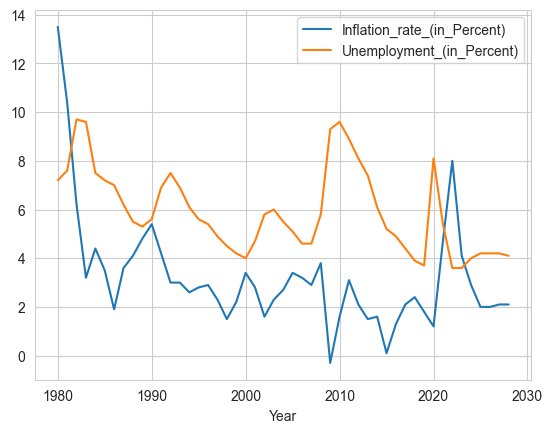

In [27]:
import seaborn as sns

# Plotting data to check code
sns.set_style('whitegrid')
dfc.plot.line(x = 'Year', y = ['Inflation_rate_(in_Percent)', 'Unemployment_(in_Percent)'])